In [1]:
from quchem.Hamiltonian_Generator_Functions import *
from quchem.Graph import *
### HAMILTONIAN start
Molecule = 'LiH'
geometry = None # [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]
basis = 'sto-6g'


### Get Hamiltonian
Hamilt = Hamiltonian_PySCF(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!
QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='BK')
### HAMILTONIAN end
QubitHamiltonian

(-3.9899724181893883+0j) [] +
(0.040374603256426764+0j) [X0 X1 X2] +
(-0.00316158760420608+0j) [X0 X1 X2 X3 Y7 Y11] +
(0.0016204769263748807+0j) [X0 X1 X2 Y3 Y5] +
(0.003650850255676713+0j) [X0 X1 X2 Z3] +
(0.0018998726581464273+0j) [X0 X1 Z2 X3 Y7 Z9 Y10 X11] +
(0.004695260540246559+0j) [X0 X1 Z2 Y3 Y4 X5] +
(-0.0012113027134827235+0j) [X0 X1 X3 X4 Y7 Y11] +
(0.0010441957704835105+0j) [X0 X1 X3 Y4 Y5 Z6 Z7] +
(0.0012113027134827235+0j) [X0 X1 X3 Y4 Z5 Y7 Z9 Z10 X11] +
(0.002559439110553971+0j) [X0 X1 X3 Z4 Y5 Y6 Z7] +
(6.648581206886874e-05+0j) [X0 X1 X3 Z4 Z5 Y7 Z9 Y10 X11] +
(0.0012777885255515925+0j) [X0 X1 X3 Z4 Y7 Z9 Y10 X11] +
(0.0009618499558327531+0j) [X0 X1 X3 X6 Y7 Y11] +
(-0.00015670172210396907+0j) [X0 X1 X3 Z6 Y7 Z9 Y10 X11] +
(0.0009618499558327531+0j) [X0 X1 X3 Y7 X8 Y11] +
(-0.0009618499558327531+0j) [X0 X1 X3 Y7 Y8 Z10 X11] +
(-0.00015670172210396864+0j) [X0 X1 X3 Y7 Z8 Z9 Y10 X11] +
(0.0008051482337287844+0j) [X0 X1 X3 Y7 Z8 Y10 X11] +
(0.015294910119292071+0j) [X0 X

In [2]:
from quchem.Ansatz_Generator_Functions import *


ansatz_obj = Ansatz(Hamilt.molecule.n_electrons, Hamilt.molecule.n_qubits)

print('JW ground state = ', ansatz_obj.Get_JW_HF_state_in_OCC_basis())
print('BK ground state = ', ansatz_obj.Get_BK_HF_state_in_OCC_basis())

JW ground state =  [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
BK ground state =  [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


The LiH ground state under JW is:

$$|\psi \rangle_{HF}^{ground} = | 1 1 1 1 \:  0 0 0 0 0 0 0 0 \rangle$$

and under BK is:

$$|\psi \rangle_{HF}^{ground} = | 1 0 1 0 0 0 0 0 0 0 0 0 \rangle$$

### Look at NATURAL orbital occupations!

In [3]:
NOON_spins_combined, NMO_basis = Hamilt.Get_NOON()
##
Hamilt.Get_CCSD_Amplitudes()

NOON_spins_combined

print(print(np.around(np.diag(NOON_spins_combined), 5)))

[[1.99992e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 1.96765e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 2.71800e-02 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 2.59000e-03 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 2.59000e-03 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 8.00000e-05]]
None


This shows that orbitals (0,1) are nearly always FILLED
and
orbitals (10,11) are nearly always UNILLED!

In paper: PHYS. REV. X, **8**, 031022 (2018)
- active space chosen to be **spatial orbitals** 1-4 (aka spin orbital indices (2,3),(4,5),(6,7),(8,9)
- aka to simply problem here orbitals (8,9) also assumed to be empty!


In [4]:
from quchem.Ansatz_Generator_Functions import *


ansatz_obj = Ansatz(Hamilt.molecule.n_electrons, Hamilt.molecule.n_qubits)



Sec_Quant_CC_ops_ia, Sec_Quant_CC_ops_ijab, theta_parameters_ia, theta_parameters_ijab=ansatz_obj.Get_ia_and_ijab_terms(single_cc_amplitudes=None, 
                                                                                                             double_cc_amplitudes=None, 
                                                                                                             singles_hamiltonian=None,
                                                                                                             doubles_hamiltonian=None, 
                                                                                                             tol_filter_small_terms = None)

Sec_Quant_CC_ops_ia

[-1.0 [0^ 4] +
 1.0 [4^ 0],
 -1.0 [0^ 6] +
 1.0 [6^ 0],
 -1.0 [0^ 8] +
 1.0 [8^ 0],
 -1.0 [0^ 10] +
 1.0 [10^ 0],
 -1.0 [2^ 4] +
 1.0 [4^ 2],
 -1.0 [2^ 6] +
 1.0 [6^ 2],
 -1.0 [2^ 8] +
 1.0 [8^ 2],
 -1.0 [2^ 10] +
 1.0 [10^ 2],
 -1.0 [1^ 5] +
 1.0 [5^ 1],
 -1.0 [1^ 7] +
 1.0 [7^ 1],
 -1.0 [1^ 9] +
 1.0 [9^ 1],
 -1.0 [1^ 11] +
 1.0 [11^ 1],
 -1.0 [3^ 5] +
 1.0 [5^ 3],
 -1.0 [3^ 7] +
 1.0 [7^ 3],
 -1.0 [3^ 9] +
 1.0 [9^ 3],
 -1.0 [3^ 11] +
 1.0 [11^ 3]]

# Remove fermionic terms we are NOT taking into account

In [5]:
def new_ia_ijab_terms(n_orbitals, n_electrons, qubits_indices_KEPT):
    from openfermion.ops import FermionOperator

    orbitals_index = range(0, n_orbitals)
    alph_occs = list(set([k for k in orbitals_index if k % 2 == 0 and k < n_electrons]).intersection(qubits_indices_KEPT)) # spin up occupied
    beta_occs = list(set([k for k in orbitals_index if k % 2 == 1 and k < n_electrons]).intersection(qubits_indices_KEPT)) # spin down UN-occupied
    alph_noccs = list(set([k for k in orbitals_index if k % 2 == 0 and k >= n_electrons]).intersection(qubits_indices_KEPT)) # spin down occupied
    beta_noccs = list(set([k for k in orbitals_index if k % 2 == 1 and k >= n_electrons]).intersection(qubits_indices_KEPT)) # spin up UN-occupied
            
    tol_filter_small_terms=None
    singles_hamiltonian=None
    doubles_hamiltonian=None
    double_cc_amplitudes=None
    single_cc_amplitudes=None

    Sec_Quant_CC_ia_ops = [] # second quantised single e- CC operators
    theta_parameters_ia = []
    Sec_Quant_CC_ijab_ops =[] # second quantised two e- CC operators
    theta_parameters_ijab =[]


    # SINGLE electron excitation: spin UP transition
    for i in alph_occs:
        for a in alph_noccs:
            if tol_filter_small_terms:
                if abs(singles_hamiltonian[i][a]) > tol_filter_small_terms or abs(singles_hamiltonian[a][i]) > tol_filter_small_terms:
                    one_elec = FermionOperator(((a, 1), (i, 0))) - FermionOperator(((i, 1), (a, 0)))
                    if single_cc_amplitudes is not None:
                        theta_parameters_ia.append(single_cc_amplitudes[a][i])
                    else:
                        theta_parameters_ia.append(0)

                    Sec_Quant_CC_ia_ops.append(one_elec)
            else:
                # NO filtering
                one_elec = FermionOperator(((a, 1), (i, 0))) - FermionOperator(((i, 1), (a, 0)))
                if single_cc_amplitudes is not None:
                    theta_parameters_ia.append(single_cc_amplitudes[a][i])
                else:
                    theta_parameters_ia.append(0)

                Sec_Quant_CC_ia_ops.append(one_elec)

    # SINGLE electron excitation: spin DOWN transition
    for i in beta_occs:
        for a in beta_noccs:
            if tol_filter_small_terms:
                # uses Hamiltonian to ignore small terms!
                if abs(singles_hamiltonian[i][a]) > tol_filter_small_terms or abs(singles_hamiltonian[a][i]) > tol_filter_small_terms:
                    one_elec = FermionOperator(((a, 1), (i, 0))) - FermionOperator(((i, 1), (a, 0)))
                    if single_cc_amplitudes is not None:
                        theta_parameters_ia.append(single_cc_amplitudes[a][i])
                    else:
                        theta_parameters_ia.append(0)

                    Sec_Quant_CC_ia_ops.append(one_elec)
            else:
                # NO filtering
                one_elec = FermionOperator(((a, 1), (i, 0))) - FermionOperator(((i, 1), (a, 0)))
                if single_cc_amplitudes is not None:
                    theta_parameters_ia.append(single_cc_amplitudes[a][i])
                else:
                    theta_parameters_ia.append(0)

                Sec_Quant_CC_ia_ops.append(one_elec)

    # DOUBLE excitation: UP + UP
    for i in alph_occs:
        for j in [k for k in alph_occs if k > i]:
            for a in alph_noccs:
                for b in [k for k in alph_noccs if k > a]:

                    if tol_filter_small_terms:
                        # uses Hamiltonian to ignore small terms!
                        if abs(doubles_hamiltonian[j][i][a][b]) > tol_filter_small_terms or abs(doubles_hamiltonian[b][a][i][j]) > tol_filter_small_terms:
                            two_elec = FermionOperator(((b, 1), (a, 1), (j, 0), (i, 0))) - \
                                       FermionOperator(((i, 1), (j, 1), (a, 0), (b, 0)))
                            if double_cc_amplitudes is not None:
                                theta_parameters_ijab.append(double_cc_amplitudes[a][i][b][j])
                            else:
                                theta_parameters_ijab.append(0)
                        Sec_Quant_CC_ijab_ops.append(two_elec)
                    else:
                        # NO filtering
                        two_elec = FermionOperator(((b, 1), (a, 1), (j, 0), (i, 0))) - \
                                   FermionOperator(((i, 1), (j, 1), (a, 0), (b, 0)))

                        if double_cc_amplitudes is not None:
                            theta_parameters_ijab.append(double_cc_amplitudes[b][a][j][i])
                        else:
                            theta_parameters_ijab.append(0)

                        Sec_Quant_CC_ijab_ops.append(two_elec)

    # DOUBLE excitation: DOWN + DOWN
    for i in beta_occs:
        for j in [k for k in beta_occs if k > i]:
            for a in beta_noccs:
                for b in [k for k in beta_noccs if k > a]:

                    if tol_filter_small_terms:
                        # uses Hamiltonian to ignore small terms!
                        if abs(doubles_hamiltonian[j][i][a][b]) > tol_filter_small_terms or abs(doubles_hamiltonian[b][a][i][j]) > tol_filter_small_terms:
                            two_elec = FermionOperator(((b, 1), (a, 1), (j, 0), (i, 0))) - \
                                       FermionOperator(((i, 1), (j, 1), (a, 0), (b, 0)))
                            if double_cc_amplitudes is not None:
                                theta_parameters_ijab.append(double_cc_amplitudes[a][i][b][j])
                            else:
                                theta_parameters_ijab.append(0)
                        Sec_Quant_CC_ijab_ops.append(two_elec)
                    else:
                        # NO filtering
                        two_elec = FermionOperator(((b, 1), (a, 1), (j, 0), (i, 0))) - \
                                   FermionOperator(((i, 1), (j, 1), (a, 0), (b, 0)))

                        if double_cc_amplitudes is not None:
                            theta_parameters_ijab.append(double_cc_amplitudes[a][i][b][j])
                        else:
                            theta_parameters_ijab.append(0)

                        Sec_Quant_CC_ijab_ops.append(two_elec)

    # DOUBLE excitation: up + DOWN
    for i in alph_occs:
        for j in [k for k in beta_occs if k > i]:
            for a in alph_noccs:
                for b in [k for k in beta_noccs if k > a]:

                    if tol_filter_small_terms:
                        # uses Hamiltonian to ignore small terms!
                        if abs(doubles_hamiltonian[j][i][a][b]) > tol_filter_small_terms or abs(doubles_hamiltonian[b][a][i][j]) > tol_filter_small_terms:
                            two_elec = FermionOperator(((b, 1), (a, 1), (j, 0), (i, 0))) - \
                                       FermionOperator(((i, 1), (j, 1), (a, 0), (b, 0)))
                            if double_cc_amplitudes is not None:
                                theta_parameters_ijab.append(double_cc_amplitudes[a][i][b][j])
                            else:
                                theta_parameters_ijab.append(0)
                        Sec_Quant_CC_ijab_ops.append(two_elec)
                    else:
                        # NO filtering
                        two_elec = FermionOperator(((b, 1), (a, 1), (j, 0), (i, 0))) - \
                                   FermionOperator(((i, 1), (j, 1), (a, 0), (b, 0)))

                        if double_cc_amplitudes is not None:
                            theta_parameters_ijab.append(double_cc_amplitudes[a][i][b][j])
                        else:
                            theta_parameters_ijab.append(0)

                        Sec_Quant_CC_ijab_ops.append(two_elec)

    return Sec_Quant_CC_ia_ops, Sec_Quant_CC_ijab_ops, theta_parameters_ia, theta_parameters_ijab

In [6]:
NEW_Sec_Quant_CC_ops_ia, NEW_Sec_Quant_CC_ops_ijab, theta_ia, theta_ijab = new_ia_ijab_terms(
                                         Hamilt.molecule.n_qubits, 
                                         Hamilt.molecule.n_electrons, 
                                         [2,3,4,5,6,7])
NEW_Sec_Quant_CC_ops_ia

[-1.0 [2^ 4] +
 1.0 [4^ 2],
 -1.0 [2^ 6] +
 1.0 [6^ 2],
 -1.0 [3^ 5] +
 1.0 [5^ 3],
 -1.0 [3^ 7] +
 1.0 [7^ 3]]

In [7]:
NEW_Sec_Quant_CC_ops_ijab

[-1.0 [2^ 3^ 4 5] +
 1.0 [5^ 4^ 3 2],
 -1.0 [2^ 3^ 4 7] +
 1.0 [7^ 4^ 3 2],
 -1.0 [2^ 3^ 6 7] +
 1.0 [7^ 6^ 3 2]]

In [8]:
# REDUCTION
Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(
                        NEW_Sec_Quant_CC_ops_ia,
                        NEW_Sec_Quant_CC_ops_ijab,
                        transformation='BK')
# Qubit_Op_list_Second_Quant_CC_Ops_ijab

In [9]:
print('finding DOUBLE e- operators only acted on by I or Z')
print('')
print(Qubit_Op_list_Second_Quant_CC_Ops_ijab)

ansatz_obj = BK_Qubit_Reduction(QubitHamiltonian,
                             Hamilt.molecule.n_electrons,
                             Hamilt.molecule.n_qubits)

indices_to_Remove_ijab = ansatz_obj.Find_Qubits_only_acted_on_by_I_or_Z(Qubit_Op_list_Second_Quant_CC_Ops_ijab)
print('')
print('qubit indices:', indices_to_Remove_ijab, 'only acted on by I or Z')

finding DOUBLE e- operators only acted on by I or Z

[0.125j [Z1 X2 Z3 Y4] +
0.125j [Z1 X2 Z3 Y4 Z5] +
-0.125j [Z1 Y2 Z3 X4] +
-0.125j [Z1 Y2 Z3 X4 Z5] +
0.125j [X2 Y4] +
0.125j [X2 Y4 Z5] +
-0.125j [Y2 X4] +
-0.125j [Y2 X4 Z5], 0.125j [Z1 X2 Z3 X4 Y5 Z6] +
0.125j [Z1 X2 Y4 X5 Z7] +
0.125j [Z1 Y2 Z3 Y4 Y5 Z6] +
-0.125j [Z1 Y2 X4 X5 Z7] +
0.125j [X2 Z3 Y4 X5 Z7] +
0.125j [X2 X4 Y5 Z6] +
-0.125j [Y2 Z3 X4 X5 Z7] +
0.125j [Y2 Y4 Y5 Z6], 0.125j [Z1 X2 Z3 Y6] +
0.125j [Z1 X2 Z5 Y6 Z7] +
-0.125j [Z1 Y2 Z3 X6] +
-0.125j [Z1 Y2 Z5 X6 Z7] +
0.125j [X2 Z3 Z5 Y6 Z7] +
0.125j [X2 Y6] +
-0.125j [Y2 Z3 Z5 X6 Z7] +
-0.125j [Y2 X6]]

qubit indices: [ 0  1  3  7  8  9 10 11] only acted on by I or Z


In [10]:
print('finding SINGLE e- operators only acted on by I or Z')
print('')
print(Qubit_Op_list_Second_Quant_CC_Ops_ia)

indices_to_Remove_ia = ansatz_obj.Find_Qubits_only_acted_on_by_I_or_Z(Qubit_Op_list_Second_Quant_CC_Ops_ia)
print('')
print('qubit indices:', indices_to_Remove_ia, 'only acted on by I or Z')

finding SINGLE e- operators only acted on by I or Z

[0.5j [Z1 X2 Y3 X4] +
0.5j [Z1 Y2 Y3 Y4], 0.5j [Z1 X2 Y3 Z5 X6] +
0.5j [Z1 Y2 Y3 Z5 Y6], 0.5j [Z1 Z2 Y3 Z4 X5] +
-0.5j [X3 Y5], 0.5j [Z1 Z2 Y3 Z5 Z6] +
-0.5j [Y3 Z7]]

qubit indices: [ 0  1  7  8  9 10 11] only acted on by I or Z


#### find overlap of allowed indices to remove

In [11]:
indices_to_Remove = list(set(indices_to_Remove_ijab).intersection(indices_to_Remove_ia))
indices_to_Remove

[0, 1, 7, 8, 9, 10, 11]

### Can remove these terms from Hamiltonian

In [12]:
reduced_Qubit_Hamiltonian = ansatz_obj.Remove_indices_from_Hamiltonian(indices_to_Remove)
reduced_Qubit_Hamiltonian

(-7.2648318379717125+0j) [] +
(0.10945352587994128+0j) [X2] +
(-0.02338015757259162+0j) [X2 X3] +
(-0.0010620487016417988+0j) [X2 X3 X4] +
(0.009344683608041752+0j) [X2 X3 X4 X5] +
(0.0016204769263748807+0j) [X2 X3 Y4 X5] +
(-0.0002763469689742367+0j) [X2 X3 Y4 Y5 Z6] +
(0.0010620487016417988+0j) [X2 X3 Y4 Z5] +
(-0.002586300331959946+0j) [X2 X3 Z4] +
(-0.0016204769263748807+0j) [X2 X3 Z4 X5] +
(0.0048364437280063715+0j) [X2 X3 Z4 Y5 Y6] +
(-0.003648349033601744+0j) [X2 X3 Z4 Z5] +
(0.0040759180851558646+0j) [X2 X3 X6] +
(-0.009750569335354996+0j) [X2 X3 Z6] +
(0.04054894009852402+0j) [X2 Y3] +
(-0.0016204769263748807+0j) [X2 Y3 X4 X5] +
(0.00032184554262424346+0j) [X2 Y3 X4 Y5] +
(0.004739070747186772+0j) [X2 Y3 Y4 X5] +
(0.004560096759032135+0j) [X2 Y3 Y4 X5 Z6] +
(-0.00586306157943042+0j) [X2 Y3 Z4 X5] +
(0.00024156424816221614+0j) [X2 Y3 Y5] +
(-0.0048364437280063715+0j) [X2 Y3 Y5 X6] +
(-0.0040759180851558646+0j) [X2 Y3 Z5 Y6] +
(-0.005674651250199131+0j) [X2 Y3 Z5 Z6] +
(0.049178

### Can remove these terms from Anstz

In [13]:
reduced_ijab_CC = ansatz_obj.Remove_indices_from_CC_qubit_operators(Qubit_Op_list_Second_Quant_CC_Ops_ijab,
                                                             indices_to_Remove)
reduced_ijab_CC

[0.125j [X2 Z3 Y4] +
 0.125j [X2 Z3 Y4 Z5] +
 0.125j [X2 Y4] +
 0.125j [X2 Y4 Z5] +
 -0.125j [Y2 Z3 X4] +
 -0.125j [Y2 Z3 X4 Z5] +
 -0.125j [Y2 X4] +
 -0.125j [Y2 X4 Z5],
 0.125j [X2 Z3 X4 Y5 Z6] +
 0.125j [X2 Z3 Y4 X5] +
 0.125j [X2 X4 Y5 Z6] +
 0.125j [X2 Y4 X5] +
 -0.125j [Y2 Z3 X4 X5] +
 0.125j [Y2 Z3 Y4 Y5 Z6] +
 -0.125j [Y2 X4 X5] +
 0.125j [Y2 Y4 Y5 Z6],
 0.125j [X2 Z3 Z5 Y6] +
 0.125j [X2 Z3 Y6] +
 0.125j [X2 Z5 Y6] +
 0.125j [X2 Y6] +
 -0.125j [Y2 Z3 Z5 X6] +
 -0.125j [Y2 Z3 X6] +
 -0.125j [Y2 Z5 X6] +
 -0.125j [Y2 X6]]

In [14]:
reduced_ia_CC = ansatz_obj.Remove_indices_from_CC_qubit_operators(Qubit_Op_list_Second_Quant_CC_Ops_ia,
                                                             indices_to_Remove)
reduced_ia_CC

[0.5j [X2 Y3 X4] +
 0.5j [Y2 Y3 Y4],
 0.5j [X2 Y3 Z5 X6] +
 0.5j [Y2 Y3 Z5 Y6],
 0.5j [Z2 Y3 Z4 X5] +
 -0.5j [X3 Y5],
 0.5j [Z2 Y3 Z5 Z6] +
 -0.5j [Y3]]

# NEXT need to re-label everything

In [15]:
# Relabelling H
relabel_dict, relabelled_reduced_Qubit_Hamiltonian = ansatz_obj.Re_label_Hamiltonian(reduced_Qubit_Hamiltonian)

print('qubit relabelling dict = ', relabel_dict)

relabelled_reduced_Qubit_Hamiltonian

qubit relabelling dict =  {2: 0, 3: 1, 4: 2, 5: 3, 6: 4}


(-7.2648318379717125+0j) [] +
(0.10945352587994128+0j) [X0] +
(-0.02338015757259162+0j) [X0 X1] +
(-0.0010620487016417988+0j) [X0 X1 X2] +
(0.009344683608041752+0j) [X0 X1 X2 X3] +
(0.0016204769263748807+0j) [X0 X1 Y2 X3] +
(-0.0002763469689742367+0j) [X0 X1 Y2 Y3 Z4] +
(0.0010620487016417988+0j) [X0 X1 Y2 Z3] +
(-0.002586300331959946+0j) [X0 X1 Z2] +
(-0.0016204769263748807+0j) [X0 X1 Z2 X3] +
(0.0048364437280063715+0j) [X0 X1 Z2 Y3 Y4] +
(-0.003648349033601744+0j) [X0 X1 Z2 Z3] +
(0.0040759180851558646+0j) [X0 X1 X4] +
(-0.009750569335354996+0j) [X0 X1 Z4] +
(0.04054894009852402+0j) [X0 Y1] +
(-0.0016204769263748807+0j) [X0 Y1 X2 X3] +
(0.00032184554262424346+0j) [X0 Y1 X2 Y3] +
(0.004739070747186772+0j) [X0 Y1 Y2 X3] +
(0.004560096759032135+0j) [X0 Y1 Y2 X3 Z4] +
(-0.00586306157943042+0j) [X0 Y1 Z2 X3] +
(0.00024156424816221614+0j) [X0 Y1 Y3] +
(-0.0048364437280063715+0j) [X0 Y1 Y3 X4] +
(-0.0040759180851558646+0j) [X0 Y1 Z3 Y4] +
(-0.005674651250199131+0j) [X0 Y1 Z3 Z4] +
(0.049178

In [16]:
# Relabelling ANSATZ
relabelled_reduced_ia_CC = ansatz_obj.Re_label_CC_qubit_operators(relabel_dict, reduced_ia_CC)
relabelled_reduced_ijab_CC = ansatz_obj.Re_label_CC_qubit_operators(relabel_dict, reduced_ijab_CC)

## Find New input state

In [17]:
print('old input = ', ansatz_obj.Get_BK_HF_state_in_OCC_basis())
print('BUT following indices removed:', indices_to_Remove)
ansatz_obj.New_BK_HF_state(indices_to_Remove)

old input =  [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
BUT following indices removed: [0, 1, 7, 8, 9, 10, 11]


array([1., 0., 0., 0., 0.])

# Find what new FCI energy is

In [18]:
new_Molecular_H_MATRIX = Hamilt.Get_sparse_Qubit_Hamiltonian_matrix(relabelled_reduced_Qubit_Hamiltonian)


from scipy.linalg import eig
eig_values, eig_vectors = eig(new_Molecular_H_MATRIX.todense())
new_FCI_Energy = min(eig_values)


print('new_FCI = ', new_FCI_Energy, 'VS old FCI:', Hamilt.molecule.fci_energy)

new_FCI =  (-7.933126725114117+3.4363353801597225e-16j) VS old FCI: -7.875652564927912


# Simulating

### Ansatz circuit 

In [19]:
import random
theta_ia_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(relabelled_reduced_ia_CC))]
theta_ijab_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(relabelled_reduced_ijab_CC))]
#combined_ia_ijab_theta_random_input = [*theta_ia_random_input, *theta_ijab_random_input]

In [20]:
new_BK_state = ansatz_obj.New_BK_HF_state(indices_to_Remove)


UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(new_BK_state,
                                     relabelled_reduced_ia_CC, 
                                     relabelled_reduced_ijab_CC)

UCCSD_ansatz_Q_Circ = UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(
                                        Theta_param_list_ia=theta_ia_random_input, 
                                         Theta_param_list_ijab=theta_ijab_random_input,
                                         ia_first=True)
UCCSD_ansatz_Q_Circ

┌─────────┐                 ┌──────────┐
0: ───X───H──────────@─────────────────────────@───H───────────Rx(0.5π)───@─────────────────────────@───────────Rx(-0.5π)───H──────────@─────────────────────────────────@──────────H───────────Rx(0.5π)───@─────────────────────────────────────────@───Rx(-0.5π)──────────────@─────────────────────────────────@──────────────────────────────────────────────────────────────────────@─────────────────────────────────@───H────────────────────@────────────────────────────@────H───────────H──────────@─────────────────────────@───────────H───Rx(0.5π)───@────────────────@───Rx(-0.5π)───Rx(0.5π)───@────────────────────────@───Rx(-0.5π)───Rx(0.5π)───@────────────────────────@───Rx(-0.5π)───Rx(0.5π)───@────────────────────────────────@───Rx(-0.5π)───H───@─────────────────────────@───H───────────H──────────@────────────────────────────────────────@───────────H───H───@─────────────────────────────────@───────────H──────────H───@─────────────────────────────────────────────────@──────────H──────────Rx(0.5π)───@─────────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@────────────────────────────────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@────────────────────────────────@───Rx(-0.5π)───Rx(0.5π)───@────────────────────────@───Rx(-0.5π)───H──────────@─────────────────────────────────@───────────H──────────H───@─────────────────────────@───H───────────H───@─────────────────@───H───────────H──────────@─────────────────────────@───────────H───Rx(0.5π)───@────────────────@───Rx(-0.5π)───Rx(0.5π)───@────────────────────────@───Rx(-0.5π)───Rx(0.5π)───@────────────────────────────────@───Rx(-0.5π)───Rx(0.5π)───@────────────────────────@───Rx(-0.5π)───H───@─────────────────────────────────────────@──────────H───H───@─────────────────────────@───────────H───
                     │                         │                          │                         │                                  │                                 │                                 │                                         │                          │                                 │                                                                      │                                 │                        │                            │                           │                         │                          │                │                          │                        │                          │                        │                          │                                │                   │                         │                          │                                        │                   │                                 │                          │                                                 │                                │                                 │                                  │                                                        │                                  │                                │                          │                        │                          │                                 │                          │                         │                   │                 │                          │                         │                          │                │                          │                        │                          │                                │                          │                        │                   │                                         │                  │                         │
1: ───I───Rx(0.5π)───X───@─────────────────@───X───Rx(-0.5π)───Rx(0.5π)───X───@─────────────────@───X───────────Rx(-0.5π)───Rx(0.5π)───X───@─────────────────────────@───X──────────Rx(-0.5π)───Rx(0.5π)───X───@─────────────────────────@───────────X───Rx(-0.5π)───Rx(0.5π)───X───@─────────────────────────@───X──────────Rx(-0.5π)───H───@────────────────@───H───────────Rx(0.5π)───X───@────────────────

### Calc ENERGY 

In [21]:
Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(relabelled_reduced_Qubit_Hamiltonian)

commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = False
Graph_colouring_strategy='largest_first'
anti_commuting_sets = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)
anti_commuting_sets

Building Graph Edges: 100%|##########| 239/239 [00:02<00:00, 105.91it/s]


{0: [(-7.2648318379717125+0j) []],
 1: [(-0.14432019122698828+0j) [Z4],
  (0.00561034624461128+0j) [Y4],
  (0.01067144919224346+0j) [X4]],
 2: [(0.01754878392503398+0j) [Z0],
  (0.004931982511596877+0j) [Y0],
  (0.10945352587994128+0j) [X0]],
 3: [(-0.134317198775725+0j) [Z2 Z3],
  (0.004739070747186772+0j) [X1 Z2 X3],
  (0.011871946723159298+0j) [Y2],
  (0.0031504256826606508+0j) [Z2 Y3 Y4],
  (-0.0031504256826606508+0j) [Z2 Y3 X4],
  (0.022273980559952417+0j) [X2],
  (-0.0029514461877150787+0j) [Z2 Y3 Z4],
  (-0.0013789126782126643+0j) [Y0 Y1 Z2 X3],
  (-0.00586306157943042+0j) [X0 Y1 Z2 X3],
  (0.03287120818002279+0j) [Z1 Z2 X3],
  (-0.0063157374666214395+0j) [Z0 Y1 Z2 X3]],
 4: [(-0.134317198775725+0j) [Z2],
  (-0.0031504256826606503+0j) [X2 Y3 Y4],
  (-0.001378912678212666+0j) [X1 X2 X3],
  (0.022273980559952417+0j) [X2 Z3],
  (0.00019897949494557276+0j) [X2 Y3 Z4],
  (-0.004739070747186772+0j) [Y0 Y1 X2 X3],
  (-2.1877723985303833e-06+0j) [Y0 Y2],
  (-0.003749322445560287+0j) [Y0

In [22]:
from quchem.LCU_method import *

In [31]:
N_QUBITS = Hamilt.molecule.n_qubits - len(indices_to_Remove)

def GIVE_ENERGY_lin_alg(theta_ia_ijab_combined):
    
    theta_ia = theta_ia_ijab_combined[:len(relabelled_reduced_ia_CC)]
    theta_ijab=theta_ia_ijab_combined[len(relabelled_reduced_ia_CC):]
    
    ansatz_cirq_circuit = UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(
                                        Theta_param_list_ia=theta_ia, 
                                         Theta_param_list_ijab=theta_ijab,
                                         ia_first=True)

    
    VQE_exp_LCU_lin_alg = VQE_Experiment_LCU_UP_lin_alg(anti_commuting_sets,
                 ansatz_cirq_circuit,
                 N_QUBITS,                     # <--- NOTE THIS
                 N_indices_dict=None) 
    
    energy = VQE_exp_LCU_lin_alg.Calc_Energy()
    
    return np.array(energy)[0][0].real

In [32]:
import random
theta_ia_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(relabelled_reduced_ia_CC))]
theta_ijab_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(relabelled_reduced_ijab_CC))]
combined_ia_ijab_theta_random_input = [*theta_ia_random_input, *theta_ijab_random_input]

GIVE_ENERGY_lin_alg(combined_ia_ijab_theta_random_input)

-11.898728938013498

In [ ]:
# [4.4973351,  4.88659058, 1.77136623, 2.33086588, 1.73946912, 1.35110629, 3.70305246]
GIVE_ENERGY_lin_alg([ 5.75665688, -0.8772283,   3.58924208,  0.87157155,  3.05396073,  4.87525153, -1.04087145])

In [ ]:
len(combined_ia_ijab_theta_random_input)

## Optimizing

In [38]:
### optimizer
from quchem.Scipy_Optimizer import _minimize_Adam, Optimizer

In [ ]:
def calc_gradient_ADAM(theta_ia_theta_jab_list):
    
    grad_list=[]
    
    for index, theta in enumerate(theta_ia_theta_jab_list):
        
        new_theta_list = theta_ia_theta_jab_list.copy()
        new_theta_list[index] = theta + np.pi/4
        
        Obs_PLUS = GIVE_ENERGY_lin_alg(new_theta_list)
               
        
        new_theta_list[index] = theta - np.pi/4
        Obs_MINUS = GIVE_ENERGY_lin_alg(new_theta_list)
        
        gradient = Obs_PLUS - Obs_MINUS
        
        grad_list.append(gradient)
        

    return np.array(grad_list)

In [ ]:
custom_optimizer_DICT = {'learning_rate': 0.1, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-8,
                           'delta': 1e-8, 'maxfev': 15000}

GG = Optimizer(GIVE_ENERGY_lin_alg,
                   combined_ia_ijab_theta_random_input,
                   args=(),
                   method=_minimize_Adam,
                   jac=calc_gradient_ADAM,
                   hess=None,
                   hessp=None,
                      bounds=None,
                   constraints=None,
                   tol=1e-20, 
                   display_convergence_message=True,
                   display_steps=True, 
                   custom_optimizer_DICT=custom_optimizer_DICT)
GG.get_env(50)
GG.plot_convergence()
plt.show()

# Modelling using linear algebra!

In [33]:
new_Molecular_H_MATRIX = Hamilt.Get_sparse_Qubit_Hamiltonian_matrix(relabelled_reduced_Qubit_Hamiltonian)
new_BK_state = ansatz_obj.New_BK_HF_state(indices_to_Remove)

In [34]:
import random
theta_ia_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(relabelled_reduced_ia_CC))]
theta_ijab_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(relabelled_reduced_ijab_CC))]
combined_ia_ijab_theta_random_input = [*theta_ia_random_input, *theta_ijab_random_input]

UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(
                                        Theta_param_list_ia=theta_ia_random_input, 
                                         Theta_param_list_ijab=theta_ijab_random_input,
                                         ia_first=True)

┌─────────┐                ┌──────────┐
0: ───X───H──────────@─────────────────────────@───H───────────Rx(0.5π)───@─────────────────────────@───────────Rx(-0.5π)───H──────────@─────────────────────────────────@──────────H───────────Rx(0.5π)───@─────────────────────────────────────────@───Rx(-0.5π)──────────────@─────────────────────────────────@──────────────────────────────────────────────────────────────────────@─────────────────────────────────@───H────────────────────@───────────────────────────@────H───────────H──────────@────────────────────────@───────────H───Rx(0.5π)───@───────────────@───Rx(-0.5π)───Rx(0.5π)───@───────────────────────@───Rx(-0.5π)───Rx(0.5π)───@───────────────────────@───Rx(-0.5π)───Rx(0.5π)───@───────────────────────────────@───Rx(-0.5π)───H───@────────────────────────@───H───────────H──────────@───────────────────────────────────────@───────────H───H───@─────────────────────────────────@───────────H──────────H───@─────────────────────────────────────────────────@──────────H──────────Rx(0.5π)───@─────────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@────────────────────────────────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@────────────────────────────────@───Rx(-0.5π)───Rx(0.5π)───@────────────────────────@───Rx(-0.5π)───H──────────@─────────────────────────────────@───────────H──────────H───@─────────────────────────@───H───────────H───@─────────────────@───H───────────H──────────@─────────────────────────@───────────H───Rx(0.5π)───@────────────────@───Rx(-0.5π)───Rx(0.5π)───@────────────────────────@───Rx(-0.5π)───Rx(0.5π)───@────────────────────────────────@───Rx(-0.5π)───Rx(0.5π)───@────────────────────────@───Rx(-0.5π)───H───@─────────────────────────────────────────@──────────H───H───@─────────────────────────@───────────H───
                     │                         │                          │                         │                                  │                                 │                                 │                                         │                          │                                 │                                                                      │                                 │                        │                           │                           │                        │                          │               │                          │                       │                          │                       │                          │                               │                   │                        │                          │                                       │                   │                                 │                          │                                                 │                                │                                 │                                  │                                                        │                                  │                                │                          │                        │                          │                                 │                          │                         │                   │                 │                          │                         │                          │                │                          │                        │                          │                                │                          │                        │                   │                                         │                  │                         │
1: ───I───Rx(0.5π)───X───@─────────────────@───X───Rx(-0.5π)───Rx(0.5π)───X───@─────────────────@───X───────────Rx(-0.5π)───Rx(0.5π)───X───@─────────────────────────@───X──────────Rx(-0.5π)───Rx(0.5π)───X───@─────────────────────────@───────────X───Rx(-0.5π)───Rx(0.5π)───X───@─────────────────────────@───X──────────Rx(-0.5π)───H───@────────────────@───H───────────Rx(0.5π)───X───@─────────────────────────@───X───

In [35]:
def Calc_E_lin_alg(theta_ia_ijab_combined):
    theta_ia = theta_ia_ijab_combined[:len(relabelled_reduced_ia_CC)]
    theta_ijab=theta_ia_ijab_combined[len(relabelled_reduced_ia_CC):]
                   
    UCCSD_ansatz_Q_Circ = UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(
                                        Theta_param_list_ia=theta_ia, 
                                         Theta_param_list_ijab=theta_ijab,
                                         ia_first=True)
                   
                   
    input_state = reduce(np.kron, [np.array([[1],[0]]) for _ in range(len(UCCSD_ansatz_Q_Circ.all_qubits()))])
    
    UCC_op = UCCSD_ansatz_Q_Circ.unitary()
    
    ansatz_state_ket = UCC_op.dot(input_state)
    ansatz_state_bra = ansatz_state_ket.transpose().conj()
    
    energy = ansatz_state_bra.dot(new_Molecular_H_MATRIX.todense().dot(ansatz_state_ket))
    return np.array(energy)[0][0].real
  
    

In [36]:
Calc_E_lin_alg(combined_ia_ijab_theta_random_input)

-7.364902050367012

0: Input_to_Funct: [2.9497511  4.22335916 5.16828868 5.17612597 2.79102912 2.24279555
 4.9936399 ]: Output: -7.438006178486452
1: Input_to_Funct: [3.04880018 4.1232513  5.26841572 5.07978196 2.86328358 2.21072858
 5.06646054]: Output: -7.507295706494184
2: Input_to_Funct: [3.14249439 4.02324125 5.36867773 5.07497118 2.94620065 2.25886002
 5.04916877]: Output: -7.567813450594521
3: Input_to_Funct: [3.21778939 3.92439788 5.46870551 5.08517831 3.03429566 2.32892446
 5.00858681]: Output: -7.612365542570954
4: Input_to_Funct: [3.25708966 3.82913338 5.56758371 5.04785476 3.12627864 2.40904497
 4.99304044]: Output: -7.64298352580462
5: Input_to_Funct: [3.26031005 3.74063608 5.66394738 4.98988587 3.22079946 2.49366615
 5.01309752]: Output: -7.664518955047918
6: Input_to_Funct: [3.23895406 3.66203088 5.75622173 4.95139202 3.31297037 2.57978843
 5.05082689]: Output: -7.677395624385816
7: Input_to_Funct: [3.20324449 3.59588218 5.84279209 4.96460038 3.393256   2.66514765
 5.09598925]: Output: -7.6

65: Input_to_Funct: [3.14223007 3.23127933 6.28239177 6.24823042 3.12017955 3.16412618
 6.31883021]: Output: -7.8531730985251995
66: Input_to_Funct: [3.14490306 3.21868837 6.2796184  6.25149127 3.12213721 3.1696793
 6.31935133]: Output: -7.8532417567637784
67: Input_to_Funct: [3.14674855 3.2074486  6.27734408 6.25742115 3.12683162 3.16394362
 6.31877652]: Output: -7.853289460085835
68: Input_to_Funct: [3.14735124 3.1978848  6.27561719 6.26525182 3.13213048 3.16682569
 6.31775374]: Output: -7.853280315002539
69: Input_to_Funct: [3.1466666  3.19023307 6.27446006 6.27422629 3.13538521 3.1665359
 6.31705195]: Output: -7.8532311863915885
70: Input_to_Funct: [3.14505744 3.18460712 6.27388846 6.28348303 3.13522819 3.1648012
 6.31717534]: Output: -7.853186375137874
71: Input_to_Funct: [3.14312073 3.1810143  6.27392264 6.29217109 3.13208962 3.16987096
 6.31814554]: Output: -7.853152406301871
72: Input_to_Funct: [3.14142593 3.1793951  6.27457956 6.29966154 3.1275227  3.16585215
 6.31954568]: Out

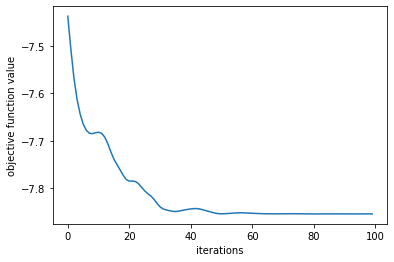

In [39]:
custom_optimizer_DICT = {'learning_rate': 0.1, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-8,
                           'delta': 1e-8, 'maxfev': 15000}

GG = Optimizer(Calc_E_lin_alg,
                   combined_ia_ijab_theta_random_input,
                   args=(),
                   method=_minimize_Adam,
                   jac=None, ##              <-grad free
                   hess=None,
                   hessp=None,
                      bounds=None,
                   constraints=None,
                   tol=1e-20, 
                   display_convergence_message=True,
                   display_steps=True, 
                   custom_optimizer_DICT=custom_optimizer_DICT)
GG.get_env(100)
GG.plot_convergence()
plt.show()

# Lin Alg partial Pn (not full H matrix!)

In [40]:
def Get_pauli_matrix(PauliOp, N_system_qubits):
    
    pauliDict={'X':np.array([[0,1],[1,0]]),
          'Y':np.array([[0,-1j],[1j,0]]),
          'Z':np.array([[1,0],[0,-1]]),
          'I': np.eye(2)}
    
    list_Q_nos, list_P_strs = list(zip(*[Paulistrs for Paulistrs, const in PauliOp.terms.items()][0]))

    list_of_ops = []
#     list_of_ops_print=[]
    for i in range(N_system_qubits):
        if i in list_Q_nos:
            index = list_Q_nos.index(i)
            list_of_ops.append(pauliDict[list_P_strs[index]])
#             list_of_ops_print.append('{}{}'.format(list_P_strs[index], i))
        else:
            list_of_ops.append(pauliDict['I'])
#             list_of_ops_print.append('I{}'.format(i))

#     print(list_of_ops_print, 'is', PauliOp)
    matrix = reduce(kron, list_of_ops)

    return matrix

In [41]:
anti_commuting_sets[8]

[(0.004836443728006371+0j) [Z0 X1 Y2 Y3 X4],
 (0.07080402086080083+0j) [Z2 Z3 Z4],
 (-0.0002763469689742367+0j) [X1 Z2 X3 Z4],
 (0.0040759180851558646+0j) [Y0 Y1 Z3 X4],
 (-0.0019236999116655062+0j) [Y1 Z3 Y4],
 (-0.002594087682901247+0j) [Y1 Z2 X3]]

In [52]:
SET_index = 8
N_index = 3



## UCCSD ansatz
new_BK_state = ansatz_obj.New_BK_HF_state(indices_to_Remove)


UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(new_BK_state,
                                     relabelled_reduced_ia_CC, 
                                     relabelled_reduced_ijab_CC)

ansatz_cirq_circuit = UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(
                                        Theta_param_list_ia=theta_ia_random_input, 
                                         Theta_param_list_ijab=theta_ijab_random_input,
                                         ia_first=True)
#####

R_uncorrected, Pn, gamma_l = Get_R_linear_combination(anti_commuting_sets[SET_index], N_index)
R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1 = absorb_complex_phases(R_uncorrected)
###



N_QUBITS = Hamilt.molecule.n_qubits - len(indices_to_Remove)

full_Q_circuit = Full_Ansatz_and_Quantum_R_circuit(Pn,
                                                   R_corrected_Op_list,
                                                   R_corr_list,
                                                   ancilla_amplitudes,
                                                   N_QUBITS, 
                                                   ansatz_cirq_circuit)
full_Q_circuit

┌─────────┐                ┌──────────┐
0: ───X──────────────────H──────────────────@────────────────────────────────────────────────────────────@───H───────────Rx(0.5π)───@─────────────────────────@───────────Rx(-0.5π)───H──────────@─────────────────────────────────@──────────H───────────Rx(0.5π)───@─────────────────────────────────────────@───Rx(-0.5π)──────────────@─────────────────────────────────@──────────────────────────────────────────────────────────────────────@─────────────────────────────────@───H────────────────────@───────────────────────────@────H───────────H──────────@────────────────────────@───────────H───Rx(0.5π)───@───────────────@───Rx(-0.5π)───Rx(0.5π)───@───────────────────────@───Rx(-0.5π)───Rx(0.5π)───@───────────────────────@───Rx(-0.5π)───Rx(0.5π)───@───────────────────────────────@───Rx(-0.5π)───H───@────────────────────────@───H───────────H──────────@───────────────────────────────────────@───────────H───H───@─────────────────────────────────@───────────H──────────H───@─────────────────────────────────────────────────@──────────H──────────Rx(0.5π)───@─────────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@────────────────────────────────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@────────────────────────────────@───Rx(-0.5π)───Rx(0.5π)───@────────────────────────@───Rx(-0.5π)───H──────────@─────────────────────────────────@───────────H──────────H───@─────────────────────────@───H───────────H───@─────────────────@───H───────────H──────────@─────────────────────────@───────────H───Rx(0.5π)───@────────────────@───Rx(-0.5π)───Rx(0.5π)───@────────────────────────@───Rx(-0.5π)───Rx(0.5π)───@────────────────────────────────@───Rx(-0.5π)───Rx(0.5π)───@────────────────────────@───Rx(-0.5π)───H───@─────────────────────────────────────────@──────────H───H───@─────────────────────────@───────────H───1*I0───1j*X0───1j*Y0───(-0-1j)*Y0───1j*Y0───1j*Y0──────────────────────────────────────────────────────────────────────────────────────────────────────────
                                            │                                                            │                          │                         │                                  │                                 │                                 │                                         │                          │                                 │                                                                      │                                 │                        │                           │                           │                        │                          │               │                          │                       │                          │                       │                          │                               │                   │                        │                          │                                       │                   │                                 │                          │                                                 │                                │                                 │                                  │                                                        │                                  │                                │                          │                        │                          │                                 │                          │                         │                   │                 │                          │                         │                          │                │                          │                        │                          │                                │                          │                        │                   │                                         │                  │                         │               │      │       │       │            │       │
1: ───I──────────────────Rx(0.5π)───────────X───@───────────────────────────────────

In [60]:
# n_qubits = len(full_Q_circuit.all_qubits())
# n_ancilla = int(np.ceil(np.log2(len(ancilla_amplitudes))))
# n_system_qubits = n_qubits-n_ancilla

# ancilla_obj = prepare_arb_state(ancilla_amplitudes, 0)
# ancilla_circ = ancilla_obj.Get_state_prep_Circuit()


# simulator = cirq.Simulator()
# result = simulator.compute_amplitudes(ancilla_circ, bitstrings=[i for i 
#                                                                 in range(2 ** len(ancilla_circ.all_qubits()))])
# print(np.around(result, 5))
# print('')
# print(ancilla_amplitudes)
# print('')
# print('amps the same:', np.allclose(result[:len(ancilla_amplitudes)], ancilla_amplitudes))

# ancilla_circ

[0.6952 +0.j 0.17626+0.j 0.67441+0.j 0.04213+0.j 0.11116+0.j 0.12909+0.j
 0.     +0.j 0.     +0.j]

[0.6951990331381047, 0.17626258571500023, 0.6744131471268241, 0.04213319758574242, 0.11116440038115699, 0.1290890465240872]

amps the same: True


0: ─── U = 0.1712 rad ───(0)────────────────────(0)────────────────(0)────────────────@──────────────────────
                         │                      │                  │                  │
1: ────────────────────── U = 0.7556 rad ───I───(0)────────────────@──────────────────(0)────────────────────
                                                │                  │                  │
2: ───────────────────────────────────────────── U = 0.2483 rad ─── U = 0.0624 rad ─── U = 0.8599 rad ───I───

In [ ]:
# ancilla_dag = cirq.Circuit(list(ancilla_circ.all_operations())[::-1])
# ancilla_dag

# G = ancilla_circ.unitary()
# G_dag = ancilla_dag.unitary()

# np.around(np.dot(G,G_dag), 3)

# np.where(np.around(np.dot(G,G_dag), 3)!=0)
# np.trace(np.around(np.dot(G,G_dag), 3)) # checking if Hermitian!

In [61]:
zero_state = np.array([[1],[0]])
initial_state = reduce(np.kron, [zero_state for _ in range(len(full_Q_circuit.all_qubits()))])

Ansatz_operator = full_Q_circuit.unitary()
ansatz_ket = Ansatz_operator.dot(initial_state)

full_density_matrix = np.outer(ansatz_ket, ansatz_ket)

n_qubits = len(full_Q_circuit.all_qubits())
n_ancilla = int(np.ceil(np.log2(len(ancilla_amplitudes))))
n_system_qubits = n_qubits-n_ancilla


###
I_system_operator = np.eye((2**n_system_qubits))
ancilla_0_state_list = [zero_state for _ in range(n_ancilla)]
ancilla_0_state = reduce(np.kron, ancilla_0_state_list)
ancilla_0_projector = np.outer(ancilla_0_state, ancilla_0_state)
###
#POVM
POVM_0_ancilla = np.kron(I_system_operator, ancilla_0_projector)
Kraus_Op_0 = POVM_0_ancilla.copy()

## POVM measure
term = Kraus_Op_0.dot(full_density_matrix.dot(Kraus_Op_0.transpose().conj()))
projected_density_matrix = term/np.trace(term)


# reshape to do the partial trace 
reshaped_dm = projected_density_matrix.reshape([2 ** n_system_qubits, 2 ** n_ancilla,
                                                2 ** n_system_qubits, 2 ** n_ancilla])
reduced_dm = np.einsum('jiki->jk', reshaped_dm)
Pn_matrix = Get_pauli_matrix(Pn, n_system_qubits)

print('')
print(Pn)
print('')

exp_val = np.trace(reduced_dm.dot(Pn_matrix.todense())).real
print(exp_val*gamma_l)


1 [Y0 Y1 Z3 X4]

(-0.03926735203980337+0j)


In [56]:
np.trace(reduced_dm)

(1-8.673617379884035e-19j)

In [57]:
from openfermion import qubit_operator_sparse
test = qubit_operator_sparse(Pn, n_qubits = n_system_qubits)

exp_val = np.trace(reduced_dm.dot(test.todense())).real
print(exp_val*gamma_l)

(-0.03926735203980337+0j)


In [ ]:
from quchem.Ansatz_Generator_Functions import *


ansatz_obj = Ansatz(Hamilt.molecule.n_electrons, Hamilt.molecule.n_qubits)



Sec_Quant_CC_ops_ia, Sec_Quant_CC_ops_ijab, theta_parameters_ia, theta_parameters_ijab=ansatz_obj.Get_ia_and_ijab_terms(single_cc_amplitudes=None, 
                                                                                                             double_cc_amplitudes=None, 
                                                                                                             singles_hamiltonian=None,
                                                                                                             doubles_hamiltonian=None, 
                                                                                                             tol_filter_small_terms = None)

Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(Sec_Quant_CC_ops_ia,
                                                                                                                    Sec_Quant_CC_ops_ijab,
                                                                                                                   transformation='BK')


In [ ]:
input_state = ansatz_obj.Get_BK_HF_state_in_OCC_basis()
print(input_state)

UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(input_state,
                                     Qubit_Op_list_Second_Quant_CC_Ops_ia, 
                                     Qubit_Op_list_Second_Quant_CC_Ops_ijab)

UCCSD_ansatz_Q_Circ =UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(Theta_param_list_ia=theta_parameters_ia, 
                                         Theta_param_list_ijab=theta_parameters_ijab,
                                         ia_first=True)
UCCSD_ansatz_Q_Circ

In [ ]:
Qubit_Op_list_Second_Quant_CC_Ops_ijab

From Helgaker, T., P. Jorgensen,and J. Olsen (2014),Molecularelectronic-structure theory(John Wiley & Sons)
we known

$$H_{2}^{ground} = 0.9939| 1100\rangle - 0.1106| 0011\rangle$$

From group theory we know only double excitation terms are important!
We can see this from our ijab operators that qubits 1 and 3 are only acted on by $Z$ therefore experience no population changes... Can even see this from the answer if we write it in BK basis:

$$H_{2}^{BK} = 0.9939| 1000\rangle - 0.1106| 0010\rangle$$

See how qubits 1 and 3 always remain at 0!

therefore can **remove** these measurements from Hamiltonian... as we know what expectation values they should give!

In the case for this Hamiltonian only $I$ and $Z$ act on these qubits! So even easier to remove (expectation values = +1 (as act on $| 0\rangle$ state!), so just remove and add to relivent H terms!

LOOK at:

PHYS. REV. X, **8**, 031022 (2018)

In [ ]:
print('double e- operators:')
print(Qubit_Op_list_Second_Quant_CC_Ops_ijab)

ansatz_obj = BK_Qubit_Reduction(QubitHamiltonian,
                             Hamilt.molecule.n_electrons,
                             Hamilt.molecule.n_qubits)

indices_to_Remove = ansatz_obj.Find_Qubits_only_acted_on_by_I_or_Z(Qubit_Op_list_Second_Quant_CC_Ops_ijab)
print('')
print('qubit indices:', indices_to_Remove, 'only acted on by I or Z')

In [ ]:
list(QubitHamiltonian)

### Can remove these terms from Hamiltonian

In [ ]:
reduced_Qubit_Hamiltonian = ansatz_obj.Remove_indices_from_Hamiltonian(indices_to_Remove)
reduced_Qubit_Hamiltonian

### Can remove these terms from Anstz

In [ ]:
reduced_ijab_CC = ansatz_obj.Remove_indices_from_CC_qubit_operators(Qubit_Op_list_Second_Quant_CC_Ops_ijab,
                                                             indices_to_Remove)
reduced_ijab_CC

# NEXT need to re-label everything

In [ ]:
relabel_dict, relabelled_reduced_Qubit_Hamiltonian = ansatz_obj.Re_label_Hamiltonian(reduced_Qubit_Hamiltonian)

print('qubit relabelling dict = ', relabel_dict)

relabelled_reduced_Qubit_Hamiltonian

In [ ]:
relabelled_reduced_ijab_CC = ansatz_obj.Re_label_CC_qubit_operators(relabel_dict, reduced_ijab_CC)
relabelled_reduced_ijab_CC

## Find New input state

In [ ]:
print('old input = ', ansatz_obj.Get_BK_HF_state_in_OCC_basis())
print('BUT following indices removed:', indices_to_Remove)
ansatz_obj.New_BK_HF_state(indices_to_Remove)

# Find what new FCI energy is
- here should be the same as true answer!

In [ ]:
new_Molecular_H_MATRIX = Hamilt.Get_sparse_Qubit_Hamiltonian_matrix(relabelled_reduced_Qubit_Hamiltonian)


from scipy.linalg import eig
eig_values, eig_vectors = eig(new_Molecular_H_MATRIX.todense())
new_FCI_Energy = min(eig_values)


print('new_FCI = ', new_FCI_Energy, 'VS old FCI:', Hamilt.molecule.fci_energy)

In [ ]:
from quchem.LCU_method import *

In [ ]:
Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(relabelled_reduced_Qubit_Hamiltonian)

commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = False
Graph_colouring_strategy='largest_first'
anti_commuting_sets = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)
anti_commuting_sets

In [ ]:
import random
theta_ijab_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(relabelled_reduced_ijab_CC))]
theta_ijab_random_input

In [ ]:
new_BK_state = ansatz_obj.New_BK_HF_state(indices_to_Remove)


UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(new_BK_state,
                                     [], 
                                     relabelled_reduced_ijab_CC)

UCCSD_ansatz_Q_Circ = UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(
                                        Theta_param_list_ia=None, 
                                         Theta_param_list_ijab=theta_ijab_random_input,
                                         ia_first=True)
UCCSD_ansatz_Q_Circ

In [ ]:
N_QUBITS = Hamilt.molecule.n_qubits - len(indices_to_Remove)

def GIVE_ENERGY_lin_alg(theta_ijab):
    
    ansatz_cirq_circuit = UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(
                                        Theta_param_list_ia=None, 
                                         Theta_param_list_ijab=theta_ijab,
                                         ia_first=True)

    
    VQE_exp_LCU_lin_alg = VQE_Experiment_LCU_UP_lin_alg(anti_commuting_sets,
                 ansatz_cirq_circuit,
                 N_QUBITS,                     # <--- NOTE THIS
                 N_indices_dict=None) 
    
    return VQE_exp_LCU_lin_alg.Calc_Energy().real

In [ ]:
GIVE_ENERGY_lin_alg(theta_ijab_random_input)

## Optimizing

In [ ]:
### optimizer
from quchem.Scipy_Optimizer import _minimize_Adam, Optimizer

def calc_gradient_ADAM(theta_ijab_list):
    
    grad_list=[]
    
    for index, theta in enumerate(theta_ijab_list):
        
        new_theta_list = theta_ijab_list.copy()
        new_theta_list[index] = theta + np.pi/4
        
        Obs_PLUS = GIVE_ENERGY_lin_alg(new_theta_list)
               
        
        new_theta_list[index] = theta - np.pi/4
        Obs_MINUS = GIVE_ENERGY_lin_alg(new_theta_list)
        
        gradient = Obs_PLUS - Obs_MINUS
        
        grad_list.append(gradient)
        

    return np.array(grad_list)

In [ ]:
custom_optimizer_DICT = {'learning_rate': 0.1, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-8,
                           'delta': 1e-8, 'maxfev': 15000}

GG = Optimizer(GIVE_ENERGY_lin_alg,
                   theta_ijab_random_input,
                   args=(),
                   method=_minimize_Adam,
                   jac=calc_gradient_ADAM,
                   hess=None,
                   hessp=None,
                      bounds=None,
                   constraints=None,
                   tol=1e-20, 
                   display_convergence_message=True,
                   display_steps=True, 
                   custom_optimizer_DICT=custom_optimizer_DICT)
GG.get_env(50)
GG.plot_convergence()
plt.show()

# Reduced Ansatz


From PHYS. REV. X, **8**, 031022 (2018):

$$U = e^{-i \theta Y_{0} X_{1}}$$

- when acting on $| 10 \rangle_{HF-BK-STATE}$ 

$$U | \psi_{HF}\rangle = | \psi_{UCCSD}\rangle$$

overall we get:

$\begin{aligned} U|01\rangle &=\left(\cos (\theta) I-i \sin (\theta) Y_{0} X_{1}\right)|10\rangle \\ &=\cos (\theta)|10\rangle-\sin (\theta)|11\rangle \end{aligned}$

- note $Y|1\rangle = -i|1\rangle$

to do this in Q.C the following circuit is employed:

In [ ]:
from quchem.Simulating_Quantum_Circuit import *
from quchem.Ansatz_Generator_Functions import *
from openfermion.ops import QubitOperator

def H2_ansatz_BK(theta):
    
    HF_circ = [cirq.X.on(cirq.LineQubit(0))]
    full_exp_circ_obj = full_exponentiated_PauliWord_circuit(QubitOperator('Y0 X1', -1j), theta)
        
    UCCSD_circ = cirq.Circuit(cirq.decompose_once((full_exp_circ_obj(*cirq.LineQubit.range(full_exp_circ_obj.num_qubits())))))
    full_circuit = cirq.Circuit([*HF_circ, *UCCSD_circ.all_operations()])
    
    return full_circuit
    
circuit_form = H2_ansatz_BK(np.pi/10)    
circuit_form

In [ ]:
Qubit_Hamiltonian_reduction = BK_Qubit_Reduction(QubitHamiltonian,
                             Hamilt.molecule.n_electrons,
                             Hamilt.molecule.n_qubits)

list_of_qubit_indices_to_remove = [1,3]

# manual removal
# list_of_correction_vals=[1,1]
# reduced_Qubit_Hamiltonian = Qubit_Hamiltonian_reduction.Remove_indices_from_Hamiltonian_manual(list_of_qubit_indices_to_remove, list_of_correction_vals)
# reduced_Qubit_Hamiltonian

new_BK_state = Qubit_Hamiltonian_reduction.New_BK_HF_state(list_of_qubit_indices_to_remove)
print(new_BK_state)

reduced_Qubit_Hamiltonian = Qubit_Hamiltonian_reduction.Remove_indices_from_Hamiltonian(list_of_qubit_indices_to_remove)
reduced_Qubit_Hamiltonian

In [ ]:
qubit_re_label_dict, reduced_RE_LABELLED_Qubit_Hamiltonian = Qubit_Hamiltonian_reduction.Re_label_Hamiltonian(reduced_Qubit_Hamiltonian)
reduced_RE_LABELLED_Qubit_Hamiltonian

In [ ]:
def Find_Qubits_only_acted_on_by_I_or_Z(N_system_Qubits, qubit_operator_list):
    
    #qubit_operator_list is intended to be either list of ia_CC_terms or ijab_CC_terms
    
    
    # Generate list of qubits
    qubits_to_remove = np.arange(1,N_system_Qubits,1)
    
    for term in qubit_operator_list:
        for op in term:
            for PauliWord, const in op.terms.items():
                qubitNos, PauliStrs = list(zip(*PauliWord))
                
                # find where non I or Z terms are
                indices_to_remove = np.where(np.isin(PauliStrs, ['X','Y']) == True)[0]
                qubitNo_to_remove = np.take(qubitNos, indices_to_remove)
                
                i_remove = np.where(np.isin(qubits_to_remove, qubitNo_to_remove) == True)[0]
                qubits_to_remove = np.delete(qubits_to_remove, i_remove)
                
    return qubits_to_remove
    

In [ ]:
Find_Qubits_only_acted_on_by_I_or_Z(4,Qubit_Op_list_Second_Quant_CC_Ops_ijab)

In [ ]:
Qubit_Op_list_Second_Quant_CC_Ops_ia

In [ ]:
Remove_Qubit_Terms(4, Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab)

In [ ]:
x=np.array(['X','X','Z', 'Y','Y'])
np.where( x== 1 or x==3)

In [ ]:
np.isin(x, ['X','Y'])

# New FCI energy

In [ ]:
new_Molecular_H_MATRIX = Hamilt.Get_sparse_Qubit_Hamiltonian_matrix(reduced_RE_LABELLED_Qubit_Hamiltonian)


from scipy.linalg import eig
eig_values, eig_vectors = eig(new_Molecular_H_MATRIX.todense())
new_FCI_Energy = min(eig_values)


print('new_FCI = ', new_FCI_Energy, 'VS old FCI:', Hamilt.molecule.fci_energy)

In [ ]:
def Remove_Qubit_Terms(indicies_removed, qubit_operators_list, qubit_relabel_dict):
    
    # This ignores any qubit operators that contain any overlap with indicies_removed
    
    from openfermion.ops import QubitOperator
    
    new_operator_list=[]
    for term in qubit_operators_list:
        new_qubitOp_term = QubitOperator()
        for op in term:
            for PauliWord, const in op.terms.items():
                qubitNos, PauliStrs = list(zip(*PauliWord))
                
                if np.isin(qubitNos, indicies_removed).any():
                    continue
                else:
                    indices_to_remove = np.where(np.isin(qubitNos, indicies_removed) == True)[0]
                    qubitNo_reduced = np.delete(qubitNos, indices_to_remove)
                    
                    qubitNo_relabelled = [qubit_relabel_dict[qNo] for qNo in qubitNo_reduced]
                    new_PauliStrs = np.delete(PauliStrs, indices_to_remove)
                    
                    new_qubit_op = list(zip(qubitNo_relabelled, new_PauliStrs.tolist()))
                    
                    if qubitNo_relabelled:
                        new_qubitOp_term+=QubitOperator(new_qubit_op, const)

        if new_qubitOp_term !=  QubitOperator():
            new_operator_list.append(new_qubitOp_term)
    return new_operator_list
    

In [ ]:
def Remove_Qubit_Terms(indicies_removed, qubit_operators_list, qubit_relabel_dict):
    
    # This ignores any qubit operators that contain any overlap with indicies_removed
    
    from openfermion.ops import QubitOperator
    
    new_operator_list=[]
    for term in qubit_operators_list:
        new_qubitOp_term = QubitOperator()
        for op in term:
            for PauliWord, const in op.terms.items():
                qubitNos, PauliStrs = list(zip(*PauliWord))
                
#                 if np.isin(qubitNos, indicies_removed).any():
#                     continue
#                 else:
                indices_to_remove = np.where(np.isin(qubitNos, indicies_removed) == True)[0]
                qubitNo_reduced = np.delete(qubitNos, indices_to_remove)

                qubitNo_relabelled = [qubit_relabel_dict[qNo] for qNo in qubitNo_reduced]
                new_PauliStrs = np.delete(PauliStrs, indices_to_remove)

                new_qubit_op = list(zip(qubitNo_relabelled, new_PauliStrs.tolist()))

#                 if qubitNo_relabelled:
                new_qubitOp_term+=QubitOperator(new_qubit_op, const)

        if new_qubitOp_term !=  QubitOperator():
            new_operator_list.append(new_qubitOp_term)
    return new_operator_list
    

In [ ]:
Remove_Qubit_Terms([1,3], Qubit_Op_list_Second_Quant_CC_Ops_ijab, {0:0, 2:1})

In [ ]:
Qubit_Op_list_Second_Quant_CC_Ops_ia

In [ ]:
Remove_Qubit_Terms([1,3], Qubit_Op_list_Second_Quant_CC_Ops_ia, {0:0, 2:1})

In [ ]:
new_reduced_CC_ia = Remove_Qubit_Terms([1,3], Qubit_Op_list_Second_Quant_CC_Ops_ia, {0:0, 2:1})
reduced_RE_LABELLED_CC_ijab =  Remove_Qubit_Terms([1,3], Qubit_Op_list_Second_Quant_CC_Ops_ijab, {0:0, 2:1})

In [ ]:
test = BK_Qubit_Reduction(Qubit_Op_list_Second_Quant_CC_Ops_ijab,
                             Hamilt.molecule.n_electrons,
                             Hamilt.molecule.n_qubits)

t = test.Remove_indices_from_Hamiltonian(list_of_qubit_indices_to_remove)
t
qubit_re_label_dict, rr = test.Re_label_Hamiltonian(t)
rr

In [ ]:
test = BK_Qubit_Reduction(Qubit_Op_list_Second_Quant_CC_Ops_ia,
                             Hamilt.molecule.n_electrons,
                             Hamilt.molecule.n_qubits)

t = test.Remove_indices_from_Hamiltonian(list_of_qubit_indices_to_remove)
t
qubit_re_label_dict, rr = test.Re_label_Hamiltonian(t)
rr

In [ ]:
reduced_CC_ijab = Qubit_Hamiltonian_reduction.Remove_indices_from_CC_qubit_operators(Qubit_Op_list_Second_Quant_CC_Ops_ijab, list_of_qubit_indices_to_remove)

print(Qubit_Op_list_Second_Quant_CC_Ops_ijab)

print('removing:', list_of_qubit_indices_to_remove, 'therefore becomes:')

reduced_CC_ijab

In [ ]:
reduced_RE_LABELLED_CC_ijab = Qubit_Hamiltonian_reduction.Re_label_CC_qubit_operators( qubit_re_label_dict, 
                                                                   reduced_CC_ijab)
reduced_RE_LABELLED_CC_ijab

In [ ]:
reduced_CC_ia = Qubit_Hamiltonian_reduction.Remove_indices_from_CC_qubit_operators(Qubit_Op_list_Second_Quant_CC_Ops_ia, list_of_qubit_indices_to_remove)

print(Qubit_Op_list_Second_Quant_CC_Ops_ia)

print('removing:', list_of_qubit_indices_to_remove, 'therefore becomes:')

reduced_CC_ia

In [ ]:
reduced_RE_LABELLED_CC_ia = Qubit_Hamiltonian_reduction.Re_label_CC_qubit_operators( qubit_re_label_dict, 
                                                                   reduced_CC_ia)
reduced_RE_LABELLED_CC_ia

In [ ]:
from scipy.linalg import expm

expm(-1j*1/2*np.eye(2))

In [ ]:
Z = np.array([[1,0],[0,-1]])

Z.transpose().conj().dot(expm(-1j*1/2*np.eye(2)).dot(Z))

In [ ]:
H=cirq.H._unitary_()
X=cirq.X._unitary_()
H.dot(X.dot(H))

In [ ]:
I=cirq.I._unitary_()
Z=cirq.Z._unitary_()
X.dot((-1*Z).dot(X))

In [ ]:
Z.dot(np.eye(2).dot(Z))

In [ ]:
cirq.H._unitary_().dot(expm(-1j*1/2*np.array([[0,1],[1,0]])).dot(cirq.H._unitary_()))


In [ ]:
# Remove Identity term!
new_reduced_CC_ia= QubitOperator()
for op in reduced_RE_LABELLED_CC_ia:
    for PauliWord, Const in op.terms.items():
        if len(PauliWord)>0:
            new_reduced_CC_ia+=QubitOperator(PauliWord, Const)
        else:
            new_reduced_CC_ia+=QubitOperator('Z0 Z1', Const)
new_reduced_CC_ia = list(new_reduced_CC_ia)
new_reduced_CC_ia

In [ ]:
import random
theta_ia_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(new_reduced_CC_ia))]
theta_ijab_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(reduced_CC_ijab))]

In [ ]:
print(new_BK_state)

UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(new_BK_state,
                                     new_reduced_CC_ia, 
                                     reduced_RE_LABELLED_CC_ijab)

UCCSD_ansatz_Q_Circ = UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(Theta_param_list_ia=theta_ia_random_input, 
                                         Theta_param_list_ijab=theta_ijab_random_input,
                                         ia_first=True)
UCCSD_ansatz_Q_Circ

In [ ]:
x = [0,1,2,500,3]
y=[1,500]

list(set(x).intersection(y))

In [ ]:
print(Sec_Quant_CC_ops_ia, Sec_Quant_CC_ops_ijab)

In [ ]:
list_of_qubit_indices_to_remove=[1]

for i in Sec_Quant_CC_ops_ia[1]:
    for C_A_op, const in i.terms.items():
        qubitNos, Crea_Annih = list(zip(*C_A_op))
        indices_to_remove = np.where(np.isin(qubitNos, list_of_qubit_indices_to_remove) == True)[0]
        new_qubitNos = np.delete(qubitNos, indices_to_remove)
        new_Crea_Annih =   np.delete(Crea_Annih, indices_to_remove)
        
        new_fermi_op = list(zip(new_qubitNos.tolist(), new_Crea_Annih.tolist()))
        
        print(FermionOperator(new_fermi_op, const))
        
        

In [ ]:
def Remove_fermionic_terms(indicies_removed, fermionic_operators_list, qubit_relabel_dict):
    from openfermion.ops import FermionOperator
    
    new_operator_list=[]
    for term in fermionic_operators_list:
        new_fermi_term = FermionOperator()
        for op in term:
            for C_A_op, const in op.terms.items():
                qubitNos, Crea_Annih = list(zip(*C_A_op))
                indices_to_remove = np.where(np.isin(qubitNos, indicies_removed) == True)[0]
                
                qubitNo_reduced = np.delete(qubitNos, indices_to_remove)
                qubitNo_relabelled = [qubit_relabel_dict[qNo] for qNo in qubitNo_reduced]
                
                new_Crea_Annih = np.delete(Crea_Annih, indices_to_remove)
            
                new_fermi_op = list(zip(qubitNo_relabelled, new_Crea_Annih.tolist()))
                
            if qubitNo_relabelled:
                new_fermi_term+=FermionOperator(new_fermi_op, const)
        if new_fermi_term !=  FermionOperator():
            new_operator_list.append(new_fermi_term)
    return new_operator_list
    

In [ ]:
Remove_fermionic_terms([1,3], Sec_Quant_CC_ops_ia, {0:0, 2:1})

In [ ]:
# CC_ia_ops = Remove_fermionic_terms([1], Sec_Quant_CC_ops_ia, {0:0, 2:1, 3:2})
# CC_ijab_ops = Remove_fermionic_terms([1], Sec_Quant_CC_ops_ijab, {0:0, 2:1, 3:2})
# print(CC_ia_ops, CC_ijab_ops)

In [ ]:
CC_ia_ops = Remove_fermionic_terms([1,3], Sec_Quant_CC_ops_ia, {0:0, 2:1})
CC_ijab_ops = Remove_fermionic_terms([1,3], Sec_Quant_CC_ops_ijab, {0:0, 2:1})
print(CC_ia_ops, CC_ijab_ops)

In [ ]:
CC_ia_ops[0]==CC_ijab_ops[0]

In [ ]:
Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(CC_ia_ops,
                                                                                                                    CC_ijab_ops,
                                                                                                                   transformation='BK')
print(Qubit_Op_list_Second_Quant_CC_Ops_ia)
print(Qubit_Op_list_Second_Quant_CC_Ops_ijab)

In [ ]:
def new_ia_ijab_terms(n_orbitals, n_electrons, qubits_indices_KEPT, qubit_relabel_dict):
    from openfermion.ops import FermionOperator

    orbitals_index = range(0, n_orbitals)
    alph_occs = list(set([k for k in orbitals_index if k % 2 == 0 and k < n_electrons]).intersection(qubits_indices_KEPT)) # spin up occupied
    beta_occs = list(set([k for k in orbitals_index if k % 2 == 1 and k < n_electrons]).intersection(qubits_indices_KEPT)) # spin down UN-occupied
    alph_noccs = list(set([k for k in orbitals_index if k % 2 == 0 and k >= n_electrons]).intersection(qubits_indices_KEPT)) # spin down occupied
    beta_noccs = list(set([k for k in orbitals_index if k % 2 == 1 and k >= n_electrons]).intersection(qubits_indices_KEPT)) # spin up UN-occupied
        
    alph_occs=[qubit_relabel_dict[q_index] for q_index in alph_occs]
    beta_occs=[qubit_relabel_dict[q_index] for q_index in beta_occs]
    alph_noccs=[qubit_relabel_dict[q_index] for q_index in alph_noccs]
    beta_noccs=[qubit_relabel_dict[q_index] for q_index in beta_noccs]
    
    tol_filter_small_terms=None
    singles_hamiltonian=None
    doubles_hamiltonian=None
    double_cc_amplitudes=None
    single_cc_amplitudes=None

    Sec_Quant_CC_ia_ops = [] # second quantised single e- CC operators
    theta_parameters_ia = []
    Sec_Quant_CC_ijab_ops =[] # second quantised two e- CC operators
    theta_parameters_ijab =[]


    # SINGLE electron excitation: spin UP transition
    for i in alph_occs:
        for a in alph_noccs:
            if tol_filter_small_terms:
                if abs(singles_hamiltonian[i][a]) > tol_filter_small_terms or abs(singles_hamiltonian[a][i]) > tol_filter_small_terms:
                    one_elec = FermionOperator(((a, 1), (i, 0))) - FermionOperator(((i, 1), (a, 0)))
                    if single_cc_amplitudes is not None:
                        theta_parameters_ia.append(single_cc_amplitudes[a][i])
                    else:
                        theta_parameters_ia.append(0)

                    Sec_Quant_CC_ia_ops.append(one_elec)
            else:
                # NO filtering
                one_elec = FermionOperator(((a, 1), (i, 0))) - FermionOperator(((i, 1), (a, 0)))
                if single_cc_amplitudes is not None:
                    theta_parameters_ia.append(single_cc_amplitudes[a][i])
                else:
                    theta_parameters_ia.append(0)

                Sec_Quant_CC_ia_ops.append(one_elec)

    # SINGLE electron excitation: spin DOWN transition
    for i in beta_occs:
        for a in beta_noccs:
            if tol_filter_small_terms:
                # uses Hamiltonian to ignore small terms!
                if abs(singles_hamiltonian[i][a]) > tol_filter_small_terms or abs(singles_hamiltonian[a][i]) > tol_filter_small_terms:
                    one_elec = FermionOperator(((a, 1), (i, 0))) - FermionOperator(((i, 1), (a, 0)))
                    if single_cc_amplitudes is not None:
                        theta_parameters_ia.append(single_cc_amplitudes[a][i])
                    else:
                        theta_parameters_ia.append(0)

                    Sec_Quant_CC_ia_ops.append(one_elec)
            else:
                # NO filtering
                one_elec = FermionOperator(((a, 1), (i, 0))) - FermionOperator(((i, 1), (a, 0)))
                if single_cc_amplitudes is not None:
                    theta_parameters_ia.append(single_cc_amplitudes[a][i])
                else:
                    theta_parameters_ia.append(0)

                Sec_Quant_CC_ia_ops.append(one_elec)

    # DOUBLE excitation: UP + UP
    for i in alph_occs:
        for j in [k for k in alph_occs if k > i]:
            for a in alph_noccs:
                for b in [k for k in alph_noccs if k > a]:

                    if tol_filter_small_terms:
                        # uses Hamiltonian to ignore small terms!
                        if abs(doubles_hamiltonian[j][i][a][b]) > tol_filter_small_terms or abs(doubles_hamiltonian[b][a][i][j]) > tol_filter_small_terms:
                            two_elec = FermionOperator(((b, 1), (a, 1), (j, 0), (i, 0))) - \
                                       FermionOperator(((i, 1), (j, 1), (a, 0), (b, 0)))
                            if double_cc_amplitudes is not None:
                                theta_parameters_ijab.append(double_cc_amplitudes[a][i][b][j])
                            else:
                                theta_parameters_ijab.append(0)
                        Sec_Quant_CC_ijab_ops.append(two_elec)
                    else:
                        # NO filtering
                        two_elec = FermionOperator(((b, 1), (a, 1), (j, 0), (i, 0))) - \
                                   FermionOperator(((i, 1), (j, 1), (a, 0), (b, 0)))

                        if double_cc_amplitudes is not None:
                            theta_parameters_ijab.append(double_cc_amplitudes[b][a][j][i])
                        else:
                            theta_parameters_ijab.append(0)

                        Sec_Quant_CC_ijab_ops.append(two_elec)

    # DOUBLE excitation: DOWN + DOWN
    for i in beta_occs:
        for j in [k for k in beta_occs if k > i]:
            for a in beta_noccs:
                for b in [k for k in beta_noccs if k > a]:

                    if tol_filter_small_terms:
                        # uses Hamiltonian to ignore small terms!
                        if abs(doubles_hamiltonian[j][i][a][b]) > tol_filter_small_terms or abs(doubles_hamiltonian[b][a][i][j]) > tol_filter_small_terms:
                            two_elec = FermionOperator(((b, 1), (a, 1), (j, 0), (i, 0))) - \
                                       FermionOperator(((i, 1), (j, 1), (a, 0), (b, 0)))
                            if double_cc_amplitudes is not None:
                                theta_parameters_ijab.append(double_cc_amplitudes[a][i][b][j])
                            else:
                                theta_parameters_ijab.append(0)
                        Sec_Quant_CC_ijab_ops.append(two_elec)
                    else:
                        # NO filtering
                        two_elec = FermionOperator(((b, 1), (a, 1), (j, 0), (i, 0))) - \
                                   FermionOperator(((i, 1), (j, 1), (a, 0), (b, 0)))

                        if double_cc_amplitudes is not None:
                            theta_parameters_ijab.append(double_cc_amplitudes[a][i][b][j])
                        else:
                            theta_parameters_ijab.append(0)

                        Sec_Quant_CC_ijab_ops.append(two_elec)

    # DOUBLE excitation: up + DOWN
    for i in alph_occs:
        for j in [k for k in beta_occs if k > i]:
            for a in alph_noccs:
                for b in [k for k in beta_noccs if k > a]:

                    if tol_filter_small_terms:
                        # uses Hamiltonian to ignore small terms!
                        if abs(doubles_hamiltonian[j][i][a][b]) > tol_filter_small_terms or abs(doubles_hamiltonian[b][a][i][j]) > tol_filter_small_terms:
                            two_elec = FermionOperator(((b, 1), (a, 1), (j, 0), (i, 0))) - \
                                       FermionOperator(((i, 1), (j, 1), (a, 0), (b, 0)))
                            if double_cc_amplitudes is not None:
                                theta_parameters_ijab.append(double_cc_amplitudes[a][i][b][j])
                            else:
                                theta_parameters_ijab.append(0)
                        Sec_Quant_CC_ijab_ops.append(two_elec)
                    else:
                        # NO filtering
                        two_elec = FermionOperator(((b, 1), (a, 1), (j, 0), (i, 0))) - \
                                   FermionOperator(((i, 1), (j, 1), (a, 0), (b, 0)))

                        if double_cc_amplitudes is not None:
                            theta_parameters_ijab.append(double_cc_amplitudes[a][i][b][j])
                        else:
                            theta_parameters_ijab.append(0)

                        Sec_Quant_CC_ijab_ops.append(two_elec)

    return Sec_Quant_CC_ia_ops, Sec_Quant_CC_ijab_ops, theta_parameters_ia, theta_parameters_ijab

In [ ]:
CC_ia_ops, CC_ijab_ops, theta_ia, theta_ijab= new_ia_ijab_terms(4,2,[0,2],{0:0, 2:1})
print(CC_ia_ops, CC_ijab_ops, theta_ia, theta_ijab)

In [ ]:
Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(CC_ia_ops,
                                                                                                                    CC_ijab_ops,
                                                                                                                   transformation='BK')
print(Qubit_Op_list_Second_Quant_CC_Ops_ia)
print(Qubit_Op_list_Second_Quant_CC_Ops_ijab)

In [ ]:


from openfermion.transforms import bravyi_kitaev
Op1 = FermionOperator(((1, 1), (0, 0)), 1)
Op2 = FermionOperator(((0, 1), (1, 0)), 1)
print(Op1,Op2)

overall_Op =  Op2 - Op1

bravyi_kitaev(overall_Op)
# bravyi_kitaev(Op1)

# Ansatz


From PHYS. REV. X, **8**, 031022 (2018):

$$U = e^{-i \theta Y_{0} X_{1}}$$

- when acting on $| 10 \rangle_{HF-BK-STATE}$ 

$$U | \psi_{HF}\rangle = | \psi_{UCCSD}\rangle$$

overall we get:

$\begin{aligned} U|01\rangle &=\left(\cos (\theta) I-i \sin (\theta) Y_{0} X_{1}\right)|10\rangle \\ &=\cos (\theta)|10\rangle-\sin (\theta)|11\rangle \end{aligned}$

- note $Y|1\rangle = -i|1\rangle$

to do this in Q.C the following circuit is employed:

In [ ]:
from quchem.Simulating_Quantum_Circuit import *
from quchem.Ansatz_Generator_Functions import *
from openfermion.ops import QubitOperator

def H2_ansatz_BK(theta):
    
    HF_circ = [cirq.X.on(cirq.LineQubit(0))]
    full_exp_circ_obj = full_exponentiated_PauliWord_circuit(QubitOperator('Y0 X1', -1j), theta)
        
    UCCSD_circ = cirq.Circuit(cirq.decompose_once((full_exp_circ_obj(*cirq.LineQubit.range(full_exp_circ_obj.num_qubits())))))
    full_circuit = cirq.Circuit([*HF_circ, *UCCSD_circ.all_operations()])
    
    return full_circuit
    
circuit_form = H2_ansatz_BK(np.pi/10)    
circuit_form

# Running Example

In [ ]:
from quchem.LCU_method import *

In [ ]:
Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(reduced_RE_LABELLED_Qubit_Hamiltonian)

commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = False
Graph_colouring_strategy='largest_first'
anti_commuting_sets = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)
anti_commuting_sets

In [ ]:
print(Qubit_Op_list_Second_Quant_CC_Ops_ia)
print(Qubit_Op_list_Second_Quant_CC_Ops_ijab)

In [ ]:
print(new_reduced_CC_ia)
print(reduced_RE_LABELLED_CC_ijab)

In [ ]:
import random
theta_ia_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(new_reduced_CC_ia))]
theta_ijab_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(reduced_RE_LABELLED_CC_ijab))]


In [ ]:
print(new_BK_state)

UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(new_BK_state,
                                     new_reduced_CC_ia, 
                                     reduced_RE_LABELLED_CC_ijab)

UCCSD_ansatz_Q_Circ = UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(Theta_param_list_ia=theta_ia_random_input, 
                                         Theta_param_list_ijab=theta_ijab_random_input,
                                         ia_first=True)
UCCSD_ansatz_Q_Circ

In [ ]:
# input_state = ansatz_obj.Get_BK_HF_state_in_OCC_basis()
# print(input_state)

# UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(input_state,
#                                      Qubit_Op_list_Second_Quant_CC_Ops_ia, 
#                                      Qubit_Op_list_Second_Quant_CC_Ops_ijab)

# UCCSD_ansatz_Q_Circ =UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(Theta_param_list_ia=theta_parameters_ia, 
#                                          Theta_param_list_ijab=theta_parameters_ijab,
#                                          ia_first=True)
# UCCSD_ansatz_Q_Circ

# N_QUBITS=4
# def GIVE_ENERGY_lin_alg(theta_ia_ijab):
    
#     theta_ia= theta_ia_ijab[:(len(Qubit_Op_list_Second_Quant_CC_Ops_ia))]
#     theta_ijab=theta_ia_ijab[(len(Qubit_Op_list_Second_Quant_CC_Ops_ia)):]
   
#     ansatz_cirq_circuit =UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(
#                                         Theta_param_list_ia=theta_ia, 
#                                          Theta_param_list_ijab=theta_ijab,
#                                          ia_first=True)

#     VQE_exp_LCU_lin_alg = VQE_Experiment_LCU_UP_lin_alg(anti_commuting_sets,
#                  ansatz_cirq_circuit,
#                  N_QUBITS,                     # <--- NOTE THIS
#                  N_indices_dict=None) 
    
#     return VQE_exp_LCU_lin_alg.Calc_Energy().real

In [ ]:
N_QUBITS = Hamilt.molecule.n_qubits - len(list_of_qubit_indices_to_remove)

def GIVE_ENERGY_lin_alg(theta_ia_ijab):
    
    theta_ia= theta_ia_ijab[:len(new_reduced_CC_ia)]
    theta_ijab=theta_ia_ijab[len(new_reduced_CC_ia):]
    
    ansatz_cirq_circuit = UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(
                                        Theta_param_list_ia=theta_ia, 
                                         Theta_param_list_ijab=theta_ijab,
                                         ia_first=True)

    
    VQE_exp_LCU_lin_alg = VQE_Experiment_LCU_UP_lin_alg(anti_commuting_sets,
                 ansatz_cirq_circuit,
                 N_QUBITS,                     # <--- NOTE THIS
                 N_indices_dict=None) 
    
    return VQE_exp_LCU_lin_alg.Calc_Energy().real

In [ ]:
import random
theta_ia_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(new_reduced_CC_ia))]
theta_ijab_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(reduced_RE_LABELLED_CC_ijab))]

theta_combined_random_input = [*theta_ia_random_input, *theta_ijab_random_input]

In [ ]:
GIVE_ENERGY_lin_alg(theta_combined_random_input)

In [ ]:
### optimizer
from quchem.Scipy_Optimizer import _minimize_Adam, Optimizer

In [ ]:
def calc_gradient_ADAM(theta_ia_theta_jab_list):
    
    grad_list=[]
    
    for index, theta in enumerate(theta_ia_theta_jab_list):
        
        new_theta_list = theta_ia_theta_jab_list.copy()
        new_theta_list[index] = theta + np.pi/4
        
        Obs_PLUS = GIVE_ENERGY_lin_alg(new_theta_list)
               
        
        new_theta_list[index] = theta - np.pi/4
        Obs_MINUS = GIVE_ENERGY_lin_alg(new_theta_list)
        
        gradient = Obs_PLUS - Obs_MINUS
        
        grad_list.append(gradient)
        

    return np.array(grad_list)

In [ ]:
custom_optimizer_DICT = {'learning_rate': 0.1, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-8,
                           'delta': 1e-8, 'maxfev': 15000}

GG = Optimizer(GIVE_ENERGY_lin_alg,
                   theta_combined_random_input,
                   args=(),
                   method=_minimize_Adam,
                   jac=calc_gradient_ADAM,
                   hess=None,
                   hessp=None,
                      bounds=None,
                   constraints=None,
                   tol=1e-20, 
                   display_convergence_message=True,
                   display_steps=True, 
                   custom_optimizer_DICT=custom_optimizer_DICT)
GG.get_env(100)
GG.plot_convergence()
plt.show()

In [ ]:
Hamilt.molecule.fci_energy

In [ ]:
from quchem.Adam_Optimizer import *

In [ ]:
def calc_gradient_ADAM(THETA):      

    Obs_PLUS = VQE_experiment_ENERGY(THETA + np.pi/4)
    Obs_MINUS = VQE_experiment_ENERGY(THETA - np.pi/4)
    
    gradient = Obs_PLUS - Obs_MINUS
        
    return gradient

In [ ]:
X0 = random.uniform(0, 2*np.pi)

opt_params, list_of_inputs, list_of_outputs = Adam_Opt(X0, VQE_experiment_ENERGY,
                                                       calc_gradient_ADAM, 
                                                       learning_rate=0.05, 
                                                       beta_1=0.9, 
                                                       beta_2=0.999, 
                                                       epsilon=1e-8,
                                                       max_iter=50,
                                                       disp=True,
                                                       tolerance=1e-3,
                                                       store_steps=True)

VQE_experiment_ENERGY(opt_params)

In [ ]:
import matplotlib.pyplot as plt
# % matplotlib inline
plt.figure()
plt.plot(list_of_outputs)
plt.xlabel('iterations')
plt.ylabel('objective function value')
plt.show()